In [1]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud

In [2]:
#use TFIDF vectorizer to convert posts into matrix of token counts and then analyse how relavant a word 
# Darshika did using google colab 

In [3]:
temp = pd.read_csv('data.csv')

In [4]:
temp.head()

,personality_type,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
0,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.023638,0.0,0.000000,0.0,0.0,0.00000,0.065758,0.0,0.000000
1,INTJ,0.0,0.071614,0.0,0.0,0.0,0.0,0.093034,0.000000,0.0,...,0.031473,0.052679,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040887,0.000000,0.0,...,0.000000,0.023152,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.061519
3,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.040967,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,INTJ,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.253479,0.0,...,0.000000,0.044442,0.0,0.025774,0.0,0.0,0.05857,0.000000,0.0,0.000000


In [5]:
print(list(temp.columns))

['personality_type', 'ability', 'able', 'absolute', 'absolutely', 'abstract', 'abuse', 'accept', 'access', 'accomplish', 'accord', 'account', 'accurate', 'achieve', 'acknowledge', 'act', 'action', 'active', 'actively', 'activity', 'actual', 'actually', 'adapt', 'add', 'address', 'adhd', 'admit', 'adu', 'advance', 'advantage', 'adventure', 'advice', 'affect', 'affection', 'afraid', 'age', 'aggressive', 'ago', 'agree', 'ah', 'ahead', 'ahough', 'air', 'album', 'alcohol', 'alive', 'allow', 'alright', 'amaze', 'america', 'american', 'amp', 'analysis', 'analyze', 'anger', 'angry', 'animal', 'anime', 'annoy', 'answer', 'anti', 'anxiety', 'anxious', 'anybody', 'anymore', 'anyways', 'apart', 'apologize', 'apparently', 'appeal', 'appear', 'appearance', 'apply', 'appreciate', 'approach', 'appropriate', 'area', 'argue', 'argument', 'arm', 'arrogant', 'art', 'article', 'artist', 'aside', 'ask', 'aspect', 'asshole', 'associate', 'assume', 'assumption', 'atheist', 'attach', 'attack', 'attempt', 'atte

In [6]:
#further analysis show more words associated with personality type that might influence model + other words
temp.drop(['enfjs', 'enfps', 'entjs', 'entps', 'infjs', 'infps', 'intjs', 'intps', 'istjs', 'istps','fe','fi'],axis=1,inplace=True)

In [8]:
mbti_eda = temp.groupby('personality_type').mean()

In [9]:
mbti_eda.head()

,ability,able,absolute,absolutely,abstract,abuse,accept,access,accomplish,accord,...,yeah,year,yep,yes,yesterday,young,youtube,yup,zero,zone
personality_type,,,,,,,,,,,,,,,,,,,,,
ENFJ,0.010650,0.018328,0.003307,0.009544,0.004025,0.003837,0.010527,0.003096,0.003640,0.005228,...,0.019570,0.018492,0.003398,0.024768,0.003087,0.009657,0.003104,0.004447,0.001973,0.002785
ENFP,0.008561,0.017392,0.003405,0.010598,0.003415,0.003628,0.011640,0.001727,0.004180,0.003637,...,0.023173,0.031903,0.005727,0.026438,0.004429,0.012131,0.004233,0.004919,0.002568,0.004135
ENTJ,0.010394,0.017761,0.003767,0.008569,0.004377,0.004548,0.011881,0.005161,0.006594,0.004162,...,0.015413,0.024460,0.005361,0.022257,0.002945,0.011056,0.003072,0.002805,0.004166,0.003639
ENTP,0.010357,0.016052,0.003835,0.009431,0.006910,0.003315,0.009733,0.003026,0.004159,0.004822,...,0.029672,0.026436,0.005402,0.020076,0.002774,0.010917,0.004014,0.003446,0.003825,0.003125
ESFJ,0.009656,0.014054,0.001745,0.007542,0.005250,0.002976,0.006776,0.000844,0.003913,0.006321,...,0.023784,0.027341,0.004012,0.022590,0.002573,0.010424,0.007145,0.001564,0.003318,0.001327


In [10]:
mbti_eda = mbti_eda.transpose()

In [11]:
mbti_eda.head()

personality_type,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
ability,0.010650,0.008561,0.010394,0.010357,0.009656,0.006529,0.008479,0.007732,0.008450,0.007246,0.010521,0.010040,0.005170,0.007501,0.007939,0.007534
able,0.018328,0.017392,0.017761,0.016052,0.014054,0.013032,0.011809,0.012601,0.019327,0.016800,0.017072,0.016859,0.013541,0.013486,0.016781,0.014904
absolute,0.003307,0.003405,0.003767,0.003835,0.001745,0.001820,0.003674,0.003154,0.003364,0.003561,0.004323,0.005302,0.002112,0.002397,0.002925,0.004572
absolutely,0.009544,0.010598,0.008569,0.009431,0.007542,0.008025,0.008217,0.008615,0.010704,0.010769,0.009786,0.009017,0.009799,0.009559,0.008723,0.012220
abstract,0.004025,0.003415,0.004377,0.006910,0.005250,0.009971,0.012905,0.003302,0.004572,0.004026,0.004584,0.006131,0.008662,0.010222,0.004987,0.004843


In [12]:
len(mbti_eda)

1488

In [19]:
#top words for each personality 

/tmp/ipykernel_4166/528208060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbti_eda_infj.sort_values('INFJ',ascending=False,inplace=True)


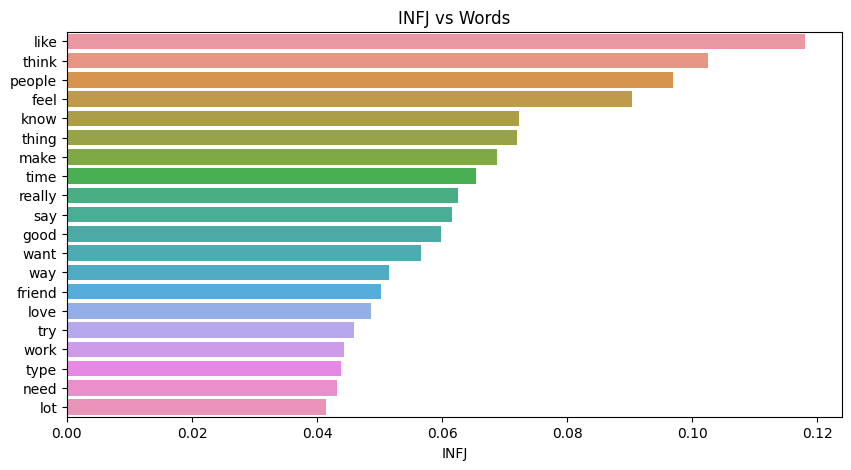

In [15]:
mbti_eda_infj = mbti_eda[['INFJ']]
mbti_eda_infj.sort_values('INFJ',ascending=False,inplace=True)
mbti_eda_infj=mbti_eda_infj.head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=mbti_eda_infj.INFJ,y=mbti_eda_infj.index)
plt.title('INFJ vs Words')
plt.show()

/tmp/ipykernel_4166/3807132257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbti_eda_istp.sort_values('ISTP',ascending=False,inplace=True)


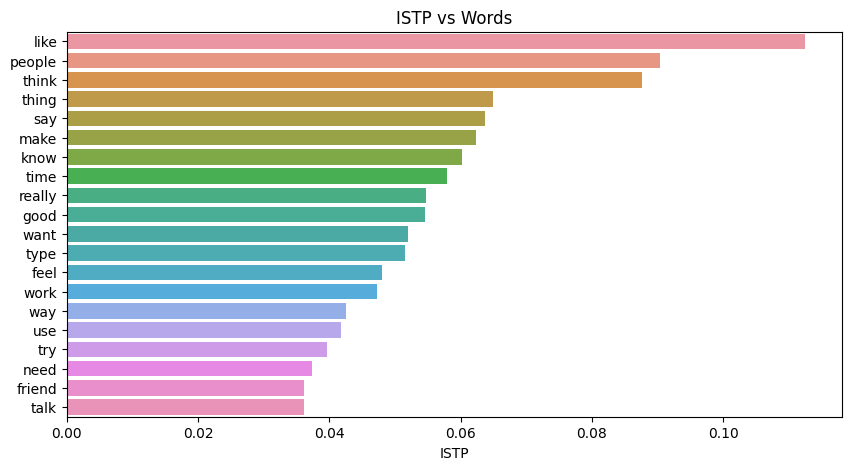

In [16]:
mbti_eda_istp = mbti_eda[['ISTP']]
mbti_eda_istp.sort_values('ISTP',ascending=False,inplace=True)
mbti_eda_istp=mbti_eda_istp.head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=mbti_eda_istp.ISTP,y=mbti_eda_istp.index)
plt.title('ISTP vs Words')
plt.show()

/tmp/ipykernel_4166/1569616165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbti_eda_estp.sort_values('ESTP',ascending=False,inplace=True)


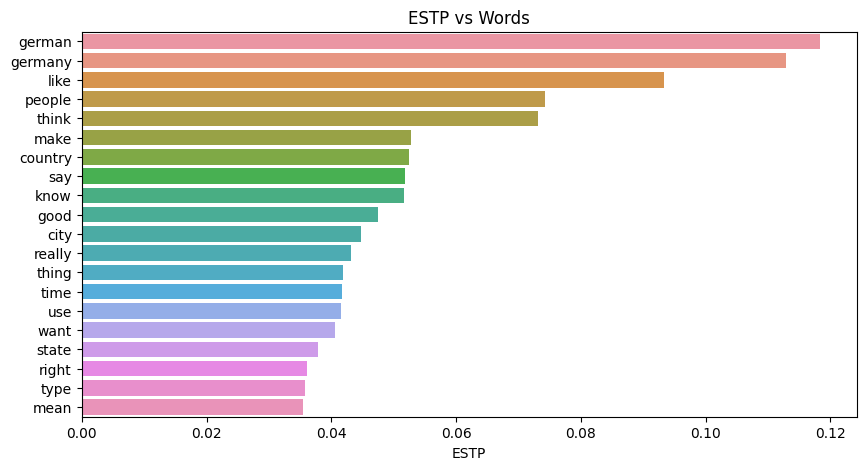

In [17]:
mbti_eda_estp = mbti_eda[['ESTP']]
mbti_eda_estp.sort_values('ESTP',ascending=False,inplace=True)
mbti_eda_estp=mbti_eda_estp.head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=mbti_eda_estp.ESTP,y=mbti_eda_estp.index)
plt.title('ESTP vs Words')
plt.show()

/tmp/ipykernel_4166/2565793650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbti_eda_entj.sort_values('ENTJ',ascending=False,inplace=True)


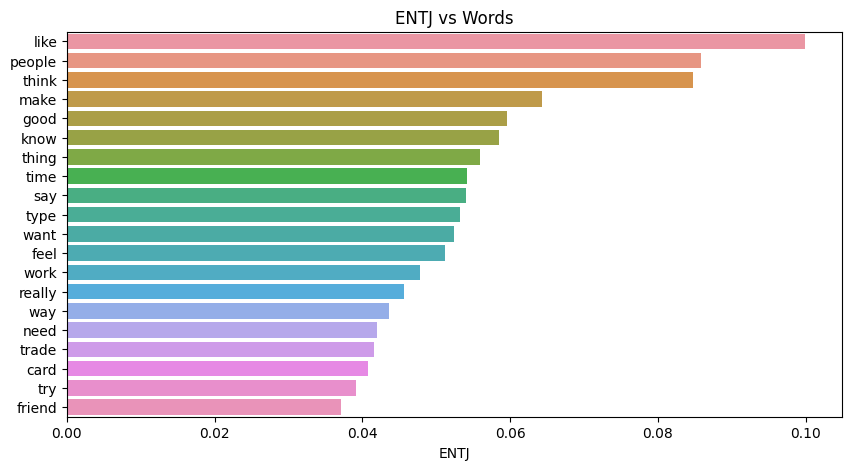

In [18]:
mbti_eda_entj = mbti_eda[['ENTJ']]
mbti_eda_entj.sort_values('ENTJ',ascending=False,inplace=True)
mbti_eda_entj=mbti_eda_entj.head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=mbti_eda_entj.ENTJ,y=mbti_eda_entj.index)
plt.title('ENTJ vs Words')
plt.show()

In [20]:
#Label encoding your personality type column from temp dataframe